# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [18]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.lines as mlines

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = ["#FF8853", "#FFE174", "#007597", "#C1C36D", "#00A697", "#BC97E0", "#ffc0bf"] #[ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [7]:
''' Miscellaneous Libraries'''
from tqdm import tqdm
import pickle

In [36]:
''' Machine Learning Libraries'''
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [3]:
trait_values_dict = {}

trait_values_dict["1.2.1"] = ["herb", "shrub", "tree"]
trait_values_dict["1.3.1"] = ["obligatory", "terrestrial"]
trait_values_dict["1.4.1"] = ["obligatory", "self-supporting"]
trait_values_dict["2.1.1"] = ["annual", "perennial"]
trait_values_dict["2.3.1"] = ["phanerophyte", "chamaephyte", "hemicryptophyte", "cryptophyte", "therophyte"]

In [4]:
focus_names = ["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form"]
focus_codes = ["1.2.1", "1.3.1", "1.4.1", "2.1.1", "2.3.1"]
df_names = ["POWO", "WIKI", "POWO_MGH"]

In [5]:
def show_values_on_bars(axs, size=14):
    def _show_on_single_plot(ax, size=size):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = max(p.get_y() + p.get_height() - 0.15, 0.1)
            value = '{:.2f}'.format(p.get_height())
            # print(_y, p.get_facecolor())
            blue_col = p.get_facecolor()[2]
            green_col = p.get_facecolor()[1]
#             if(p.get_height()<0.2):
#                 continue
            if(green_col>0.5):# or green_col<0.4):
                ax.text(_x, _y, value, ha="center", size=size) 
            else:
                ax.text(_x, _y, value, ha="center", size=size, color="white")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Result Data

In [9]:
with open("..//Data//Results//Probabilistic_Predictions.pkl", 'rb') as f:
    prediction_probabilities_dict = pickle.load(f)

# Receiver Operating Characteristic Curve (ROC)

In [12]:
fpr_dict, tpr_dict, roc_auc_dict = dict(), dict(), dict()

for focus_name, focus_code in zip(focus_names[:], focus_codes[:]):
    N_classes = len(trait_values_dict[focus_code])
    print("Trait Name:", focus_name)
    for df_name in df_names[:]:
        print("Dataset:", df_name)

        y_pred_proba = prediction_probabilities_dict[df_name, df_name, focus_name]["y_pred_sigmoid"]
        y_true = prediction_probabilities_dict[df_name, df_name, focus_name]["y_true"]
        
        print(y_pred_proba.shape)
        label_binarizer = LabelBinarizer().fit(y_true)
        y_true_onehot = label_binarizer.transform(y_true)
        if(N_classes == 2):
            y_true_onehot = np.hstack((1 - y_true_onehot, y_true_onehot))
        print(y_true_onehot.shape)

        for i in range(N_classes):
            fpr_dict[focus_name, df_name, i], tpr_dict[focus_name, df_name,i], _ = roc_curve(y_true_onehot[:, i], y_pred_proba[:, i])
            roc_auc_dict[focus_name, df_name,i] = auc(fpr_dict[focus_name, df_name,i], tpr_dict[focus_name, df_name,i])

        fpr_grid = np.linspace(0.0, 1.0, 1000)

        # Interpolate all ROC curves at these points
        mean_tpr = np.zeros_like(fpr_grid)

        for i in range(N_classes):
            mean_tpr += np.interp(fpr_grid, fpr_dict[focus_name, df_name,i], tpr_dict[focus_name, df_name,i])  # linear interpolation

        # Average it and compute AUC
        mean_tpr /= N_classes

        fpr_dict[focus_name, df_name,"macro"] = fpr_grid
        tpr_dict[focus_name, df_name,"macro"] = mean_tpr
        roc_auc_dict[focus_name, df_name,"macro"] = auc(fpr_dict[focus_name, df_name,"macro"], tpr_dict[focus_name, df_name,"macro"])

        print(f"Macro-averaged One-vs-Rest ROC AUC score for dataset {df_name} and trait {focus_name}:\n{roc_auc_dict[focus_name, df_name,'macro']:.2f}")

Trait Name: Growth Form
Dataset: POWO
(11518, 3)
(11518, 3)
Macro-averaged One-vs-Rest ROC AUC score for dataset POWO and trait Growth Form:
0.98
Dataset: WIKI
(12374, 3)
(12374, 3)
Macro-averaged One-vs-Rest ROC AUC score for dataset WIKI and trait Growth Form:
0.98
Dataset: POWO_MGH
(10950, 3)
(10950, 3)
Macro-averaged One-vs-Rest ROC AUC score for dataset POWO_MGH and trait Growth Form:
0.98
Trait Name: Epiphyte
Dataset: POWO
(11000, 2)
(11000, 2)
Macro-averaged One-vs-Rest ROC AUC score for dataset POWO and trait Epiphyte:
0.98
Dataset: WIKI
(11168, 2)
(11168, 2)
Macro-averaged One-vs-Rest ROC AUC score for dataset WIKI and trait Epiphyte:
1.00
Dataset: POWO_MGH
(10297, 2)
(10297, 2)
Macro-averaged One-vs-Rest ROC AUC score for dataset POWO_MGH and trait Epiphyte:
0.98
Trait Name: Climber
Dataset: POWO
(11371, 2)
(11371, 2)
Macro-averaged One-vs-Rest ROC AUC score for dataset POWO and trait Climber:
0.98
Dataset: WIKI
(12606, 2)
(12606, 2)
Macro-averaged One-vs-Rest ROC AUC score f

# Precision-Recall Curve

In [37]:
precision_dict, recall_dict, average_precision_dict = dict(), dict(), dict()
threshold_pr_dict = dict()
for focus_name, focus_code in zip(focus_names[:], focus_codes[:]):
    N_classes = len(trait_values_dict[focus_code])

    for df_name in df_names[:2]:

        y_pred_proba = prediction_probabilities_dict[df_name, df_name, focus_name]["y_pred_sigmoid"]
        y_true = prediction_probabilities_dict[df_name, df_name, focus_name]["y_true"]
        
        print(y_pred_proba.shape)
        label_binarizer = LabelBinarizer().fit(y_true)
        y_true_onehot = label_binarizer.transform(y_true)
        if(N_classes == 2):
            y_true_onehot = np.hstack((1 - y_true_onehot, y_true_onehot))
            
        for i in range(N_classes):
            precision_dict[focus_name, df_name, i], recall_dict[focus_name, df_name,i], threshold_pr_dict[focus_name, df_name,i] = precision_recall_curve(y_true_onehot[:, i], y_pred_proba[:, i])
            average_precision_dict[focus_name, df_name,i] = average_precision_score(y_true_onehot[:, i], y_pred_proba[:, i])

        pr_grid = np.linspace(0.0, 1.0, 100)

        
        # Interpolate all ROC curves at these points
        mean_recall = np.zeros_like(pr_grid)
        macro_precision = 0
        
        for i in range(N_classes):
            mean_recall += np.interp(pr_grid, precision_dict[focus_name, df_name,i], recall_dict[focus_name, df_name,i])/N_classes  # linear interpolation
            macro_precision += average_precision_dict[focus_name, df_name,i]/N_classes
            
        precision_dict[focus_name, df_name,"macro"] = pr_grid
        recall_dict[focus_name, df_name,"macro"] = mean_recall
        average_precision_dict[focus_name, df_name,"macro"] = macro_precision

        print(f"Macro-averaged Precision score for dataset {df_name} and trait {focus_name}:\n{average_precision_dict[focus_name, df_name,'macro']:.2f}")

(11518, 3)
Macro-averaged Precision score for dataset POWO and trait Growth Form:
0.92
(12374, 3)
Macro-averaged Precision score for dataset WIKI and trait Growth Form:
0.96
(11000, 2)
Macro-averaged Precision score for dataset POWO and trait Epiphyte:
0.95
(11168, 2)
Macro-averaged Precision score for dataset WIKI and trait Epiphyte:
0.99
(11371, 2)
Macro-averaged Precision score for dataset POWO and trait Climber:
0.94
(12606, 2)
Macro-averaged Precision score for dataset WIKI and trait Climber:
0.90
(9084, 2)
Macro-averaged Precision score for dataset POWO and trait Lifecycle:
0.93
(11101, 2)
Macro-averaged Precision score for dataset WIKI and trait Lifecycle:
0.95
(5350, 5)
Macro-averaged Precision score for dataset POWO and trait Life Form:
0.88
(6262, 5)
Macro-averaged Precision score for dataset WIKI and trait Life Form:
0.86


C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\2622638877.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\2622638877.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\2622638877.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\2622638877.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)


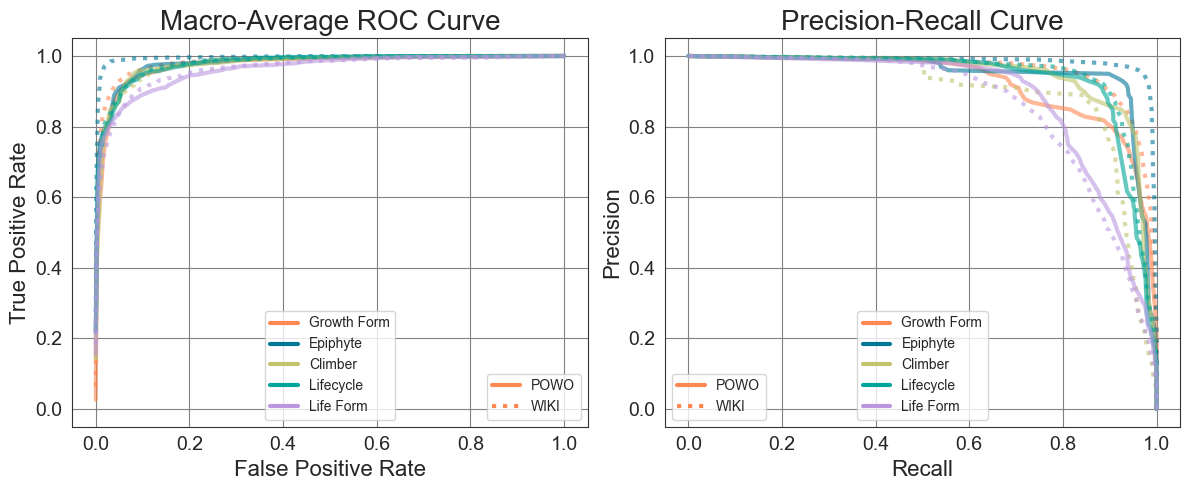

In [40]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

palette = color_palette[0:1] + color_palette[2:] + color_palette[:1]

plt.subplot(121)
for i, (focus_name, focus_code) in enumerate(zip(focus_names[:], focus_codes[:])):
    N_classes = len(trait_values_dict[focus_code])

    plt.plot(
        fpr_dict[focus_name, "POWO", "macro"],
        tpr_dict[focus_name, "POWO","macro"],
        # label=f"{focus_name} Precision Curve",
        linestyle="-",
        linewidth=3,
        alpha=0.6,
        color = palette[i]
    )

    plt.plot(
        fpr_dict[focus_name, "WIKI", "macro"],
        tpr_dict[focus_name, "WIKI","macro"],
        # label=f"{focus_name} Precision Curve",
        linestyle=":",
        linewidth=3,
        alpha=0.6,
        color = palette[i]
    )
    

plt.xlabel("False Positive Rate", size = 16)
plt.ylabel("True Positive Rate", size = 16)
ax[0].set_xticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
ax[0].set_yticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

traits = [mlines.Line2D([], [], color=palette[i], marker='', ls='-', linewidth = 3, label=focus_name) for i, focus_name in enumerate(focus_names)]
plt.legend(handles=traits)

datasets = [mlines.Line2D([], [], color=palette[0], marker='', ls='-', linewidth = 3, label="POWO"), mlines.Line2D([], [], color=palette[0], marker='', ls=':', linewidth = 3, label="WIKI")]

legend1 = plt.legend(handles = datasets, loc = 0)
plt.legend(handles=traits, loc = 8)
plt.gca().add_artist(legend1)
# plt.axis("square")
plt.title("Macro-Average ROC Curve", size = 20)

plt.subplot(122)
for i, (focus_name, focus_code) in enumerate(zip(focus_names[:], focus_codes[:])):
    N_classes = len(trait_values_dict[focus_code])

    plt.plot(
        recall_dict[focus_name, "POWO", "macro"],
        precision_dict[focus_name, "POWO","macro"],
        # label=f"{focus_name} Precision Curve",
        linestyle="-",
        linewidth=3,
        alpha=0.6,
        color = palette[i]
    )

    plt.plot(
        recall_dict[focus_name, "WIKI", "macro"],
        precision_dict[focus_name, "WIKI","macro"],
        # label=f"{focus_name} Precision Curve",
        linestyle=":",
        linewidth=3,
        alpha=0.6,
        color = palette[i]
    )
    

plt.xlabel("Recall", size = 16)
plt.ylabel("Precision", size = 16)
ax[1].set_xticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
ax[1].set_yticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

traits = [mlines.Line2D([], [], color=palette[i], marker='', ls='-', linewidth = 3, label=focus_name) for i, focus_name in enumerate(focus_names)]
plt.legend(handles=traits)

datasets = [mlines.Line2D([], [], color=palette[0], marker='', ls='-', linewidth = 3, label="POWO"), mlines.Line2D([], [], color=palette[0], marker='', ls=':', linewidth = 3, label="WIKI")]

legend1 = plt.legend(handles = datasets, loc = 0)
plt.legend(handles=traits, loc = 8)
plt.gca().add_artist(legend1)
# plt.axis("square")
plt.title("Precision-Recall Curve", size = 20)

plt.tight_layout()
plt.show()

# Threshold Rate vs Precision/Recall

In [15]:
precision_threshold_score, recall_threshold_score = dict(), dict()
threshold_score = np.linspace(0.0, 1.0, 1000)

for focus_name, focus_code in zip(focus_names[:], focus_codes[:]):
    N_classes = len(trait_values_dict[focus_code])

    for df_name in df_names[:2]:

        y_pred_proba = prediction_probabilities_dict[df_name, df_name, focus_name]["y_pred_sigmoid"]
        y_true = prediction_probabilities_dict[df_name, df_name, focus_name]["y_true"]
        
        print(y_pred_proba.shape)
        label_binarizer = LabelBinarizer().fit(y_true)
        y_true_onehot = label_binarizer.transform(y_true)
        if(N_classes == 2):
            y_true_onehot = np.hstack((1 - y_true_onehot, y_true_onehot))
            
        for i in range(N_classes):
            
            tmp_list_precision = []
            tmp_list_recall = []

            for t in np.linspace(0.0, 1.0, 1000):
                y_pred_class = np.where(y_pred_proba[:, i]>t, 1, 0)
                y_test_class = y_true_onehot[:, i]
                tmp_list_precision.append(precision_score(y_test_class, y_pred_class, zero_division=0))
                tmp_list_recall.append(recall_score(y_test_class, y_pred_class))
    
            precision_threshold_score[focus_name, df_name, i] = np.array(tmp_list_precision)
            recall_threshold_score[focus_name, df_name, i] = np.array(tmp_list_recall)

        precision_threshold_score[focus_name, df_name, "macro"] = np.zeros(threshold_score.shape)
        recall_threshold_score[focus_name, df_name, "macro"] = np.zeros(threshold_score.shape)

        for i in range(N_classes):
            precision_threshold_score[focus_name, df_name, "macro"] += precision_threshold_score[focus_name, df_name, i]/N_classes 
            recall_threshold_score[focus_name, df_name, "macro"] += recall_threshold_score[focus_name, df_name, i]/N_classes

(11518, 3)
(12374, 3)
(11000, 2)
(11168, 2)
(11371, 2)
(12606, 2)
(9084, 2)
(11101, 2)
(5350, 5)
(6262, 5)


C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\2525135913.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\2525135913.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\2525135913.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\2525135913.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)


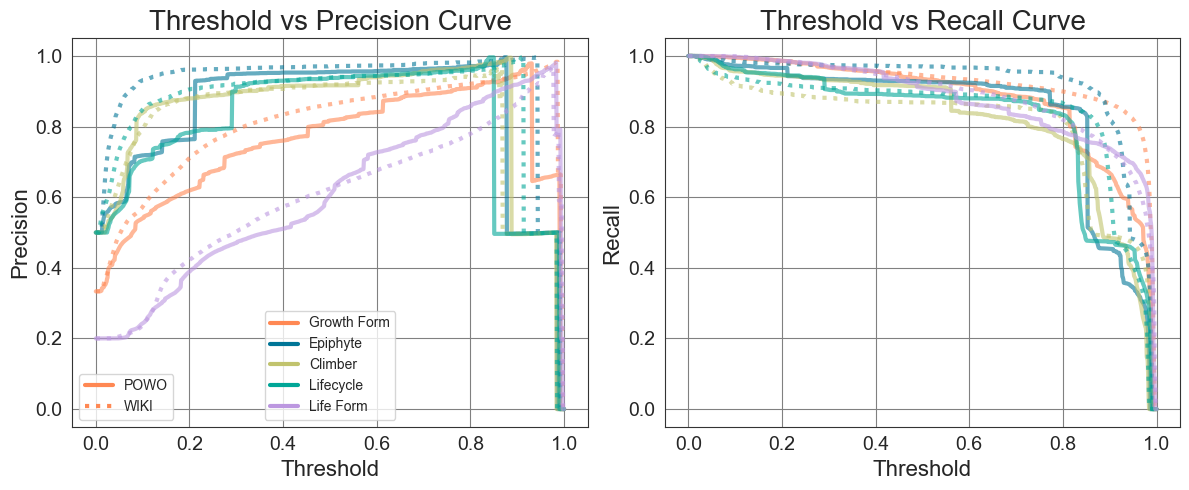

In [19]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
i = 0
palette = color_palette[0:1] + color_palette[2:] + color_palette[:1]

for focus_name, focus_code in zip(focus_names[:], focus_codes[:]):
    N_classes = len(trait_values_dict[focus_code])

    plt.subplot(1,2,1)
    plt.plot(
        threshold_score,
        precision_threshold_score[focus_name, "POWO", "macro"],
        label=f"{focus_name} Precision Curve",
        linestyle="-",
        linewidth=3,
        alpha=0.6,
        color = palette[i]
    )

    plt.plot(
        threshold_score,
        precision_threshold_score[focus_name, "WIKI", "macro"],
        label=f"{focus_name} Precision Curve",
        linestyle=":",
        linewidth=3,
        alpha=0.6,
        color = palette[i]
    )

    plt.title("Threshold vs Precision Curve", fontsize = 20)
    
    plt.subplot(1,2,2)
    plt.plot(
        threshold_score,
        recall_threshold_score[focus_name, "POWO", "macro"],
        label=f"{focus_name} Recall Curve",
        linestyle="-",
        linewidth=3,
        alpha=0.6,
        color = palette[i]
    )

    plt.plot(
        threshold_score,
        recall_threshold_score[focus_name, "WIKI", "macro"],
        label=f"{focus_name} Recall Curve",
        linestyle=":",
        linewidth=3,
        alpha=0.6,
        color = palette[i]
    )
    plt.title("Threshold vs Recall Curve", fontsize = 20)

    i+=1 
    
plt.subplot(1,2,1)
plt.xlabel("Threshold", size = 16)
plt.ylabel("Precision", size = 16)
ax[0].set_xticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
ax[0].set_yticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

traits = [mlines.Line2D([], [], color=palette[i], marker='', ls='-', linewidth = 3, label=focus_name) for i, focus_name in enumerate(focus_names)]
plt.legend(handles=traits)

datasets = [mlines.Line2D([], [], color=palette[0], marker='', ls='-', linewidth = 3, label="POWO"), mlines.Line2D([], [], color=palette[0], marker='', ls=':', linewidth = 3, label="WIKI")]

legend1 = plt.legend(handles = datasets, loc = 0)
plt.legend(handles=traits, loc = 8)
plt.gca().add_artist(legend1)

plt.subplot(1,2,2)
plt.xlabel("Threshold", size = 16)
plt.ylabel("Recall", size = 16)
ax[1].set_xticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
ax[1].set_yticklabels(np.round(np.arange(0, 1.3, 0.2)-0.2, 1), size=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05,)
plt.tight_layout()

# plt.savefig("Figures/Threshold_Precision_Recall_Curves.png", dpi=600, bbox_inches='tight')
plt.show()